# Estabilidade

Quando fazemos um modelo, é muito importante avaliar se as variáveis que estamos utilizando são estáveis. Se tivermos uma base com medidas no tempo, podemos avaliar:

1. se as distribuições das variáveis explicativas são estáveis no tempo e
2. se as médias da variável resposta são estáveis no tempo por grupos de explicativas.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Fixing random state for reproducibility
np.random.seed(2360873)

In [34]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


In [35]:
tips.shape

(244, 8)

####  Preparação da base de dados

Vamos fazer uma reamostragem da base de gorjetas para simular que essa base tenha medidas em três meses distintos, para podermos comparar as distribuições das variáveis no tempo.

In [36]:
n_meses = 3
n_clientes = 210

datas = pd.Series(pd.date_range('1/1/2019', periods = n_meses, freq = 'MS').repeat(n_clientes))

dados = tips.sample(n = n_meses * n_clientes, replace=True).reset_index()

tips2 = pd.concat([datas, dados], axis = 1)
tips2.rename({0:'data_ref'}, inplace = True, axis = 'columns')
tips2

,data_ref,index,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,2019-01-01,23,39.42,7.58,Male,No,Sat,Dinner,4,0.238065
1,2019-01-01,228,13.28,2.72,Male,No,Sat,Dinner,2,0.257576
2,2019-01-01,239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166
3,2019-01-01,190,15.69,1.50,Male,Yes,Sun,Dinner,2,0.105708
4,2019-01-01,157,25.00,3.75,Female,No,Sun,Dinner,4,0.176471
...,...,...,...,...,...,...,...,...,...,...
625,2019-03-01,65,20.08,3.15,Male,No,Sat,Dinner,3,0.186060
626,2019-03-01,18,16.97,3.50,Female,No,Sun,Dinner,3,0.259837
627,2019-03-01,35,24.06,3.60,Male,No,Sat,Dinner,3,0.175953
628,2019-03-01,133,12.26,2.00,Female,No,Thur,Lunch,2,0.194932


#### Avaliação da distribuição

A distribuição das variáveis explicativas pode ser avaliada via gráfico de barras. Se uma variável tem sua distribuição alterada subitamente, é importante entender o fenômeno. Uma pandemia por exemplo pode alterar significativamente a distribuição de diversas variáveis, nesse caso, deve-se estudar tais variáveis para avaliar se o modelo continua funcionando.

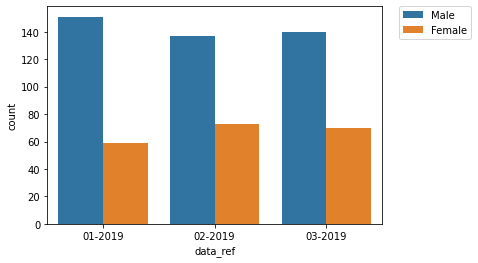

In [37]:
ax = sns.countplot(x='data_ref',  hue = 'sex', data=tips2)

tick_labs = tips2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# tick_labs.tolist()

ticks = ax.set_xticks(list(range(tips2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Barras empilhadas

Especialistas sugerem que barras não empilhadas sejam melhores para comparar distribuições, mas barras empilhadas podem ser uma opção estética para um painel.

In [45]:
tab = pd.crosstab(tips2['data_ref'],tips2['sex'],normalize='index')
tab
#tab.div(tab.sum(axis = 1), axis = 0)

sex,Male,Female
data_ref,,
2019-01-01,0.719048,0.280952
2019-02-01,0.652381,0.347619
2019-03-01,0.666667,0.333333


In [46]:
tab = pd.crosstab(tips2['data_ref'],tips2['sex'])
tab.div(tab.sum(axis = 1), axis = 0)

sex,Male,Female
data_ref,,
2019-01-01,0.719048,0.280952
2019-02-01,0.652381,0.347619
2019-03-01,0.666667,0.333333


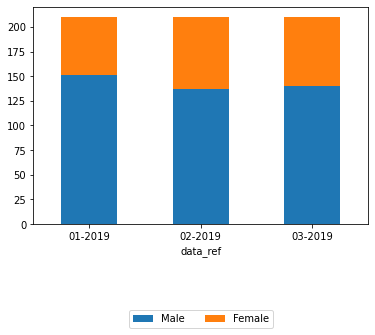

In [9]:
tab_freq = pd.crosstab(tips2['data_ref'],tips2['sex'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab.plot.bar(stacked = True)

tick_labs = tips2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(tips2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

#### Perfis médios no tempo

Essa informação é crucial para avaliar a qualidade de um modelo e sua estabilidade. Instabilidade nas médias da variável resposta para perfís específicos é um sinal crítico de alerta para a qualidade de um modelo que considere tais perfís.

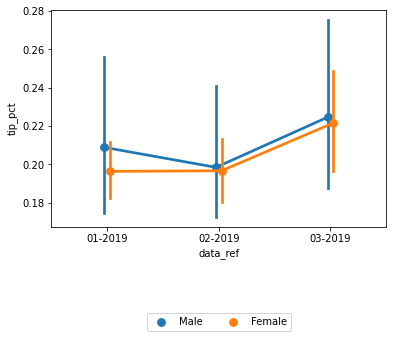

In [48]:
ax = sns.pointplot(x="data_ref", y="tip_pct", hue = 'sex',
                   data=tips2, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = tips2['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(tips2['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)